In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['KERAS_BACKEND'] = 'cntk'

### Helper Functions

In [2]:
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

### Generate sample data and split Train/Test

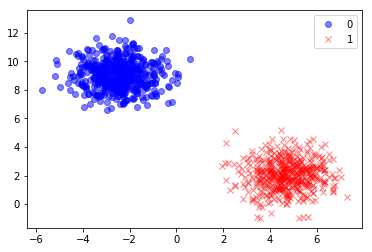

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Keras Model

In [4]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

# Define Optimizer, Loss and Metrics
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

# Start the Learning
model.fit(X_train, y_train, epochs=100, verbose=0)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend
/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


### Print the performance

In [5]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

300/300 [==============================] - 0s 106us/step


Test loss: 7.06142377263556e-05 Test accuracy: 1.0


/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


### Plot Decision Boundary

/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


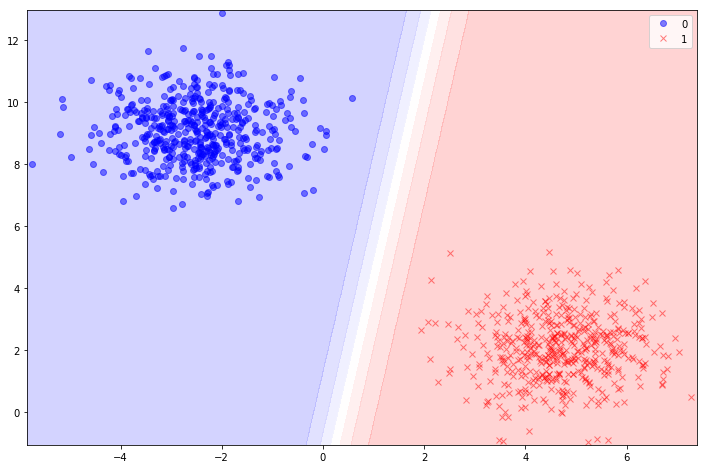

In [6]:
plot_decision_boundary(model, X, y).show()